In [5]:
#conda install geopandas

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import math

map_df = gpd.read_file("./shapes/USA_States.shp")
df = pd.read_csv("data/objects.csv", sep=",", low_memory=False)

In [7]:
#stevilo podjetij na regijo
dictHelper = {"state": [], "numOrg":[]}
for state in df["state_code"].unique():
    if state != "NaN":
        dictHelper["state"].append(state)
        dictHelper["numOrg"].append(len(df[df["state_code"] == state]))
        #data = data.concat({"state": state, "numOrganization": len(df[df["state_code"] == state])}, ignore_index=True)

data = pd.DataFrame(dictHelper)
data.dropna(subset=["state"], inplace=True)

merged = map_df.set_index("STATE_ABBR").join(data.set_index("state"))

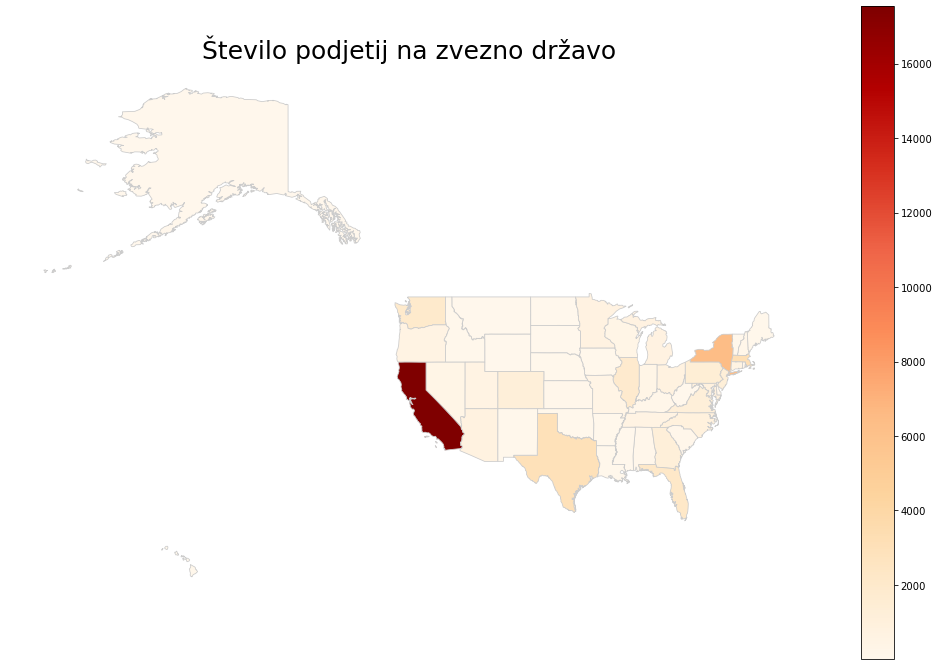

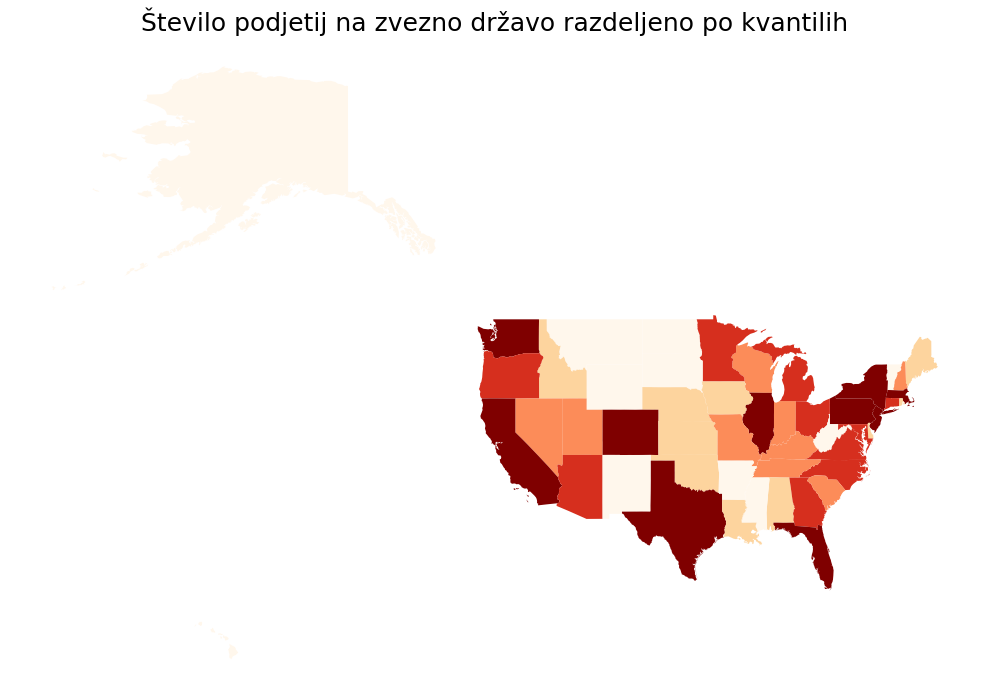

In [8]:
#zemljevid stevila podjetij po regijah
maxOrg = merged["numOrg"].max()
minOrg = merged["numOrg"].min()


fig, ax = plt.subplots(1, figsize=(18,12))
merged.plot(column="numOrg", cmap="OrRd", linewidth=0.8, ax=ax, edgecolor="0.8") #BuGn
ax.axis("off")
ax.set_title("Število podjetij na zvezno državo", fontdict={"fontsize": "25", "fontweight" : "3"})
sm = plt.cm.ScalarMappable(cmap="OrRd", norm=plt.Normalize(vmin=minOrg, vmax=maxOrg))
sm._A = []
cbar = fig.colorbar(sm)
plt.savefig("image2.png")

fig, ax2 = plt.subplots(1, figsize=(18,12))
merged.plot(column='numOrg', cmap='OrRd', ax=ax2, scheme='quantiles');
ax2.axis("off")
ax2.set_title("Število podjetij na zvezno državo razdeljeno po kvantilih", fontdict={"fontsize": "25", "fontweight" : "3"})
plt.savefig("image.png")

In [9]:
def get_objects():
    return pd.read_csv("data/objects.csv", sep=",", low_memory=False)
objects = get_objects()
companies = objects[objects["entity_type"] == "Company"]

#Najboljša industrija v vsaki državici
max_average_state_per_state = companies[companies["funding_total_usd"] > 0].groupby(["state_code", "category_code"])["funding_total_usd"].mean()
#max_average_state_per_state =  max_average_state_per_state.reset_index().loc[max_average_state_per_industry.reset_index().groupby("state_code")["funding_total_usd"].idxmax()]
max_average_state_per_state = max_average_state_per_state.reset_index().loc[max_average_state_per_state.reset_index().groupby("state_code")["funding_total_usd"].idxmax()]
len(pd.unique(max_average_state_per_state["category_code"]))
#print(max_average_state_per_state)

merged2 = map_df.set_index("STATE_ABBR").join(max_average_state_per_state.set_index("state_code"))
merged2

,STATE_NAME,STATE_FIPS,geometry,category_code,funding_total_usd
STATE_ABBR,,,,,
WA,Washington,53,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",mobile,1.168005e+08
MT,Montana,30,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...",education,1.190000e+07
ME,Maine,23,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...",local,3.350000e+07
ND,North Dakota,38,"POLYGON ((-98.73044 45.93827, -99.00683 45.939...",biotech,3.458827e+07
SD,South Dakota,46,"POLYGON ((-102.78838 42.99530, -103.00588 42.9...",medical,2.530000e+07
WY,Wyoming,56,"POLYGON ((-104.05362 41.69822, -104.05550 41.5...",education,1.000000e+07
WI,Wisconsin,55,"MULTIPOLYGON (((-87.74855 44.96162, -87.83999 ...",cleantech,1.025879e+07
ID,Idaho,16,"POLYGON ((-117.02630 43.67903, -117.02379 43.7...",semiconductor,5.041040e+07
VT,Vermont,50,"POLYGON ((-73.25806 42.74606, -73.26928 42.747...",advertising,2.213417e+07


Text(0.5, 1.0, 'Prevladajoča industrija v državi')

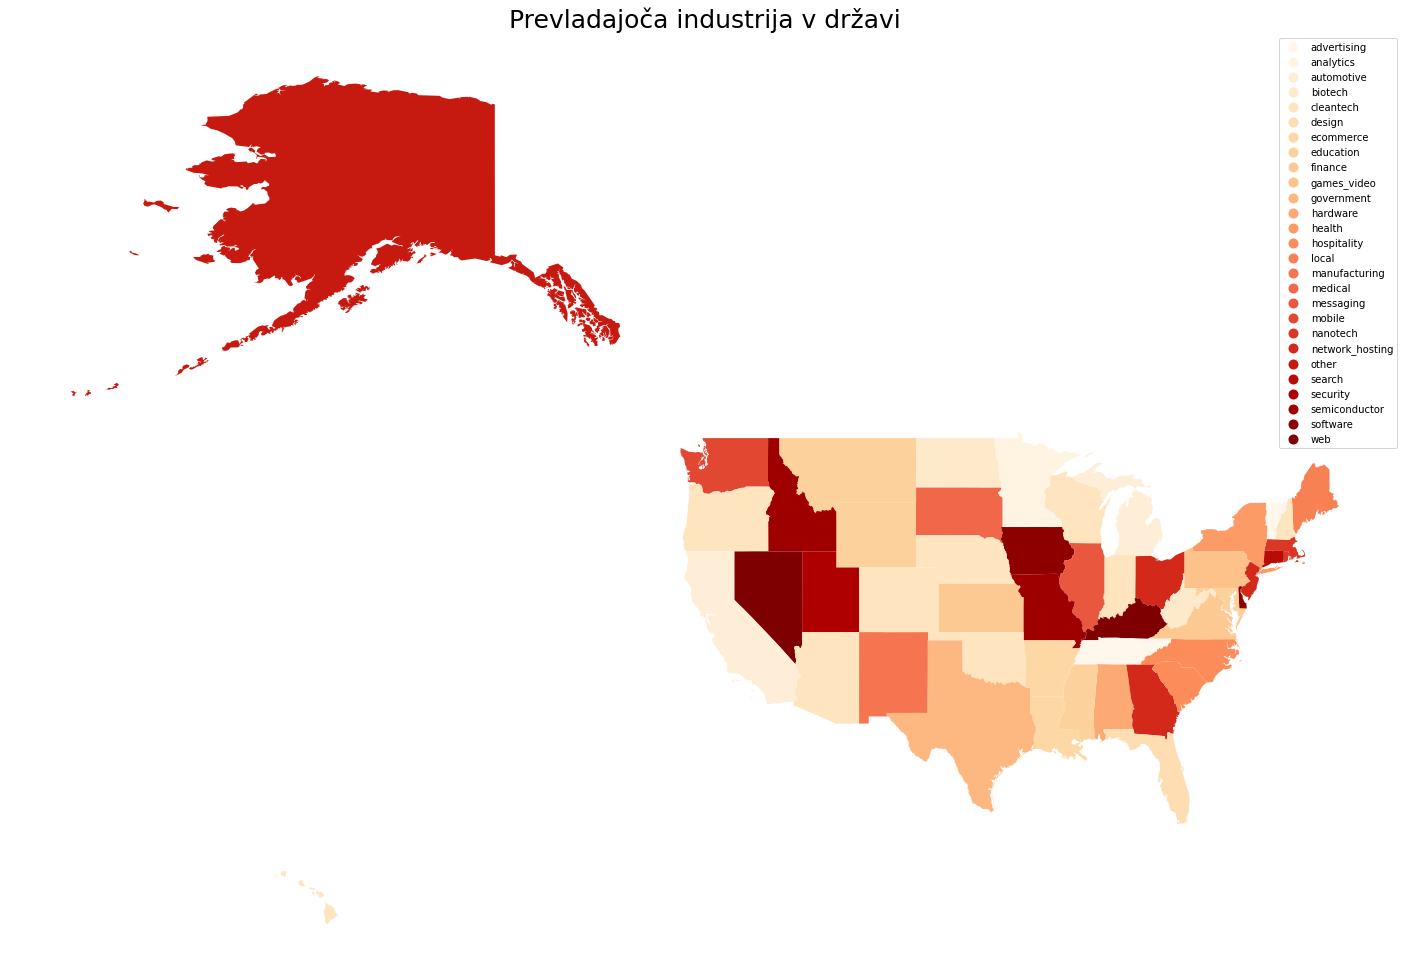

In [12]:
fig, ax = plt.subplots(1, figsize=(25,20))
merged2.plot(column='category_code', cmap='OrRd', ax=ax, legend=True) #k=len(merged2["category_code"].unique())
ax.axis("off")
ax.set_title("Prevladajoča industrija v državi", fontdict={"fontsize": "25", "fontweight" : "3"})
#plt.savefig("image.png")

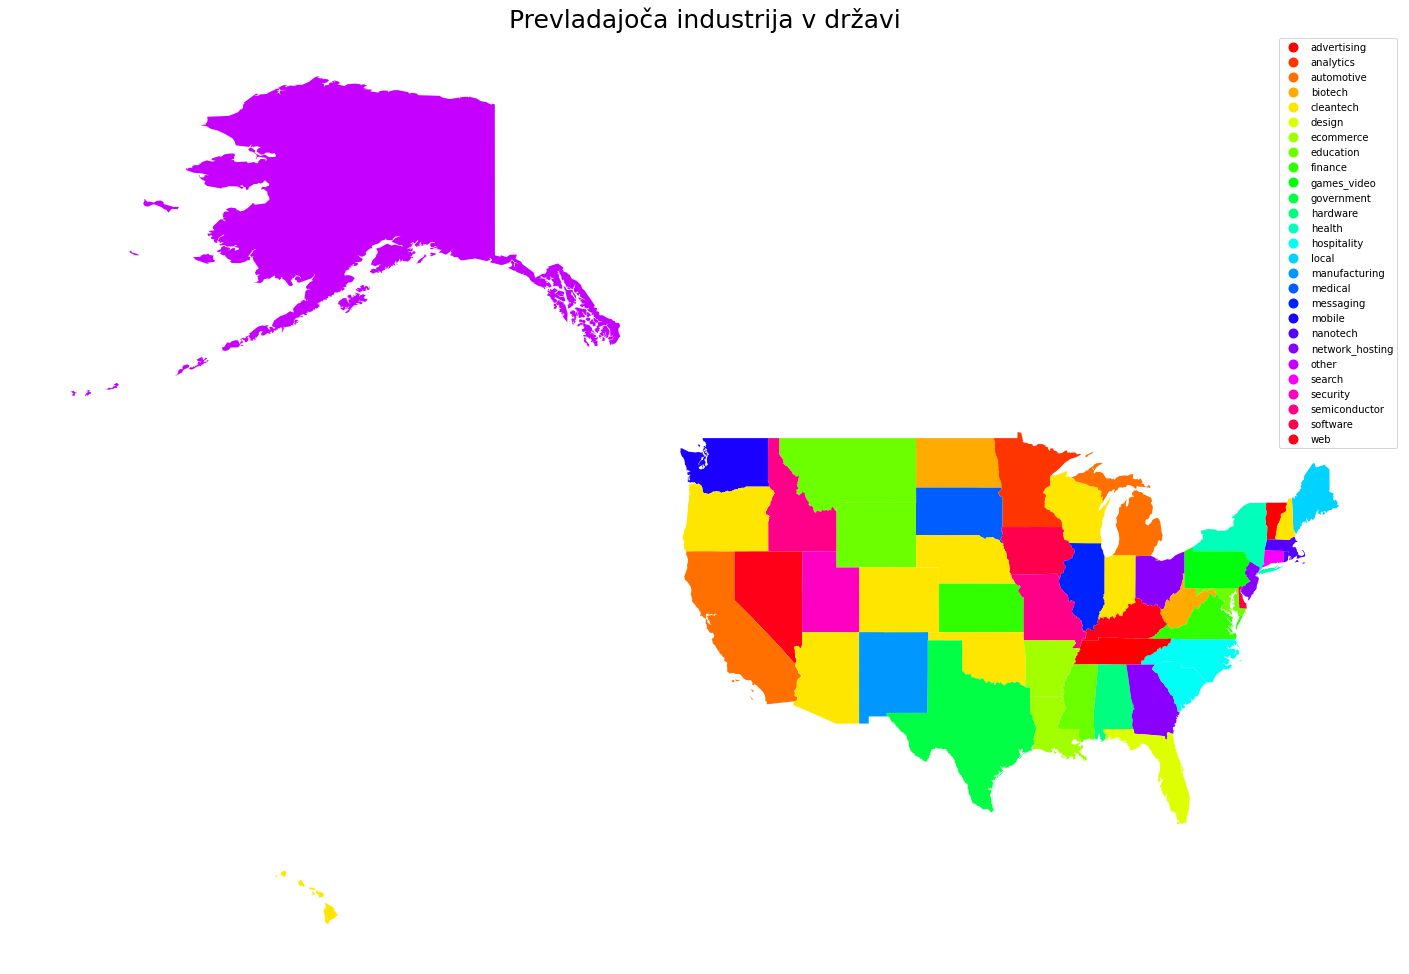

In [17]:
#colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np

#viridis = cm.get_cmap('hsv', len(merged2["category_code"]))
#newcmap = ListedColormap(viridis(np.linspace(0,1,len(merged2["category_code"]))))

fig, ax = plt.subplots(1, figsize=(25,20))
merged2.plot(column='category_code', ax=ax, cmap="hsv",legend=True) #k=len(merged2["category_code"].unique())
ax.axis("off")
ax.set_title("Prevladajoča industrija v državi", fontdict={"fontsize": "25", "fontweight" : "3"})
plt.savefig("industry.png")